<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_4_2/blob/main/0119%20Day4/8_%EA%B0%80%EC%83%81%EC%87%BC%ED%95%91%EB%AA%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 쇼핑몰 고객 주문 데이터 파악하기**

### **1-1. 데이터셋**
* 온라인 리테일 사이트 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건 데이터

In [2]:
import numpy as np
import pandas as pd

retail = pd.read_csv('./OnlineRetail.csv')

In [3]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

* InvoiceNo : 주문번호
* StockCode :아이템 아이디
* Description : 상품 설명
* Quantity : 상품 주문 수량
* InvoiceDate : 주문 시각
* UnitPrice : 상품 가격(동일한 통화)
* CustomerID : 고객 아이디
* Country : 고객 거주 지역(국가)

In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# 각 필드당 Null이 몇개 있는지 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# CustomerID의 Null을 제거
retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

In [9]:
# 수량, 가격이 0보다 큰 데이터만 저장
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

397884

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


### **1-2. 새로운 column 추가**
* 수량*가격은 고객의 총 지출비용(CheckoutPrice)

In [12]:
retail['CheckoutPrice'] = retail['UnitPrice']*retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### **1-3. 정제 데이터 저장**

In [13]:
retail.to_csv('./OnlineRetailClean.csv')

# **2. 매출, 가장 많이 팔린 아이템 확인하기**

In [14]:
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [15]:
dtypes ={
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('./OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


### **2-1. 날짜 타입 데이터 변환하기**
* 문자열로 데이터를 로딩하는 것 보다 date/datetime 형태로 변환하는 것이 계산에 용이

In [17]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [18]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [19]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### **2-2. 매출**

In [20]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [21]:
# 국가별 매출
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

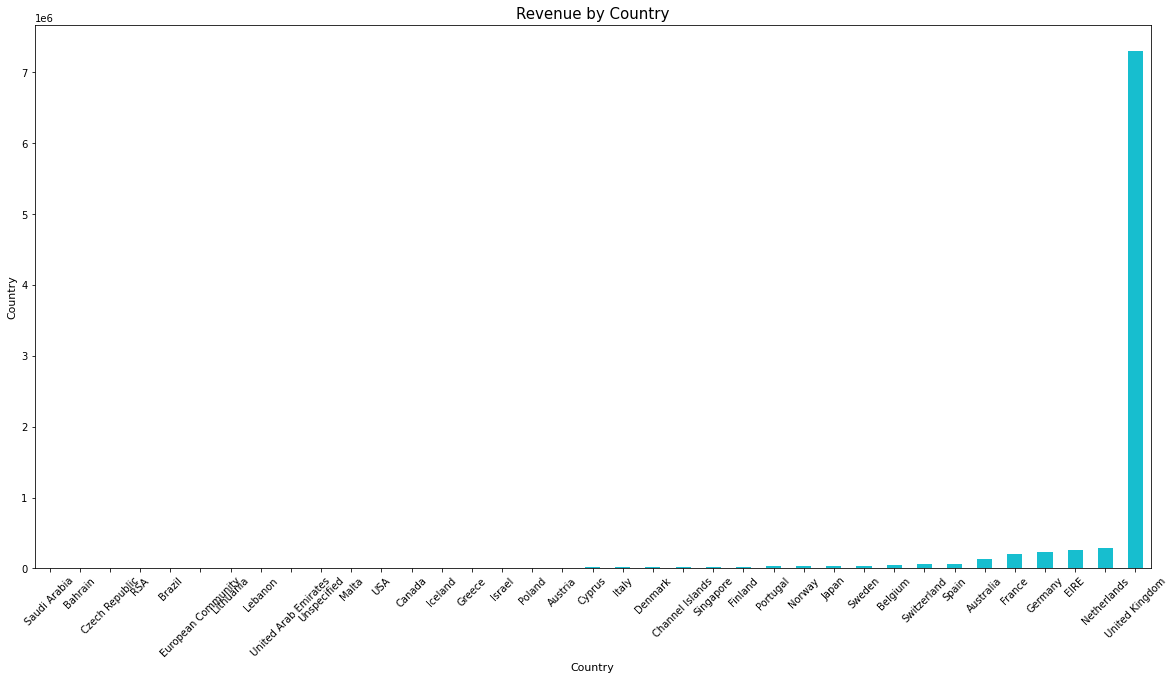

In [23]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Country', fontsize=11)
plot.set_title('Revenue by Country', fontsize=15)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [24]:
# 판매 비율
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

In [26]:
# 월별 매출
retail['InvoiceDate'].sort_values(ascending=True)

def extract_month(date):   # 20110901
  month = str(date.month)
  if date.month < 10:
    month = '0' + month
  return str(date.year) + month  # 201109

rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
print(rev_by_month)

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64


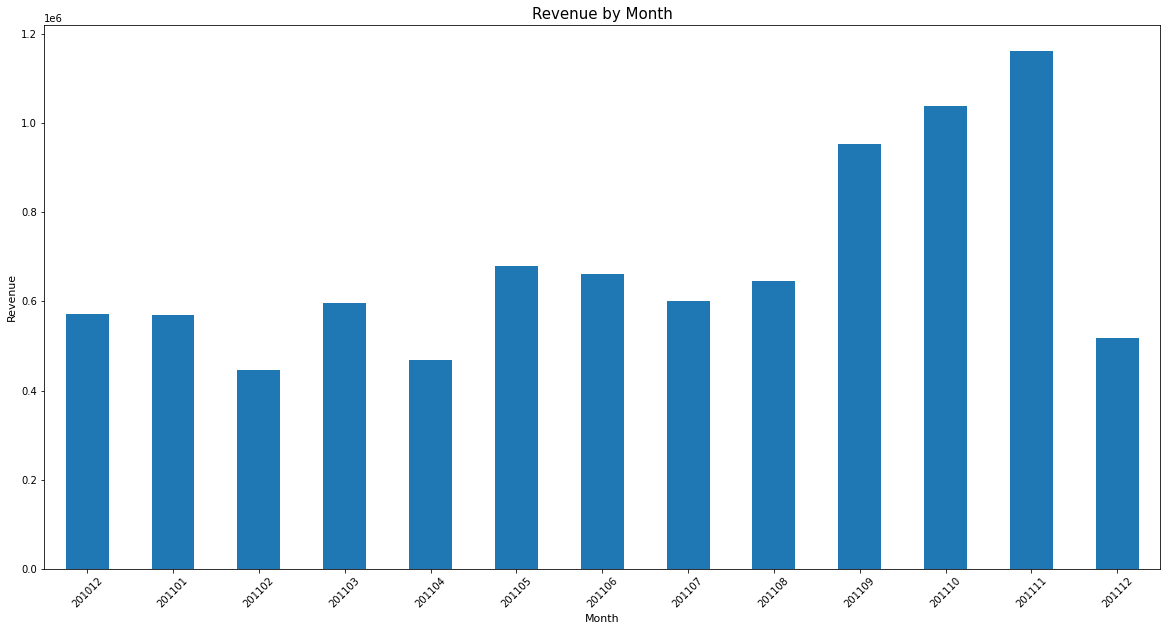

In [32]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
  plot = df.plot(kind='bar', color=color, figsize=figsize)
  plot.set_xlabel(xlabel, fontsize=11)
  plot.set_ylabel(ylabel, fontsize=11)
  plot.set_title(title, fontsize=15)
  plot.set_xticklabels(labels=df.index, rotation=rotation)

plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

In [36]:
# 요일별 매출
# 날짜.dayofweek
def extract_dayofweek(date):
  dayofweek =str(date.dayofweek)
  return dayofweek

rev_by_dayofweek = retail.set_index('InvoiceDate').groupby(extract_dayofweek).sum()['CheckoutPrice']
print(rev_by_dayofweek)

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64


In [38]:
# 람다식 표현
rev_by_dayofweek = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
print(rev_by_dayofweek)

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64


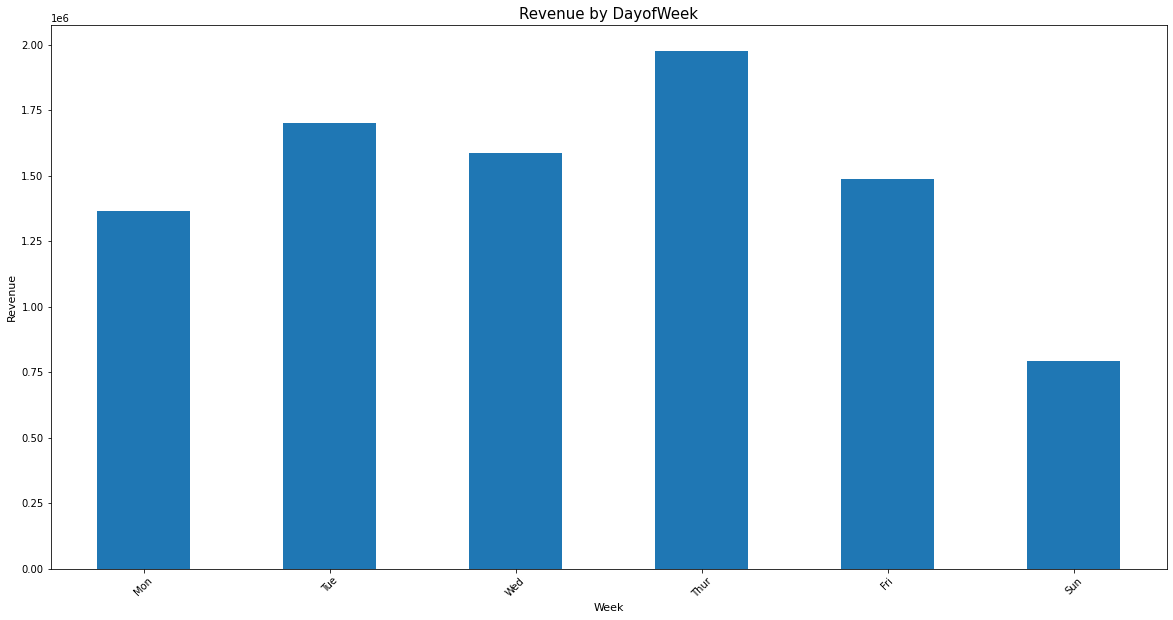

In [39]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dayofweek.index = DAY_OF_WEEK[rev_by_dayofweek.index]
plot_bar(rev_by_dayofweek, 'Week', 'Revenue', 'Revenue by DayofWeek')

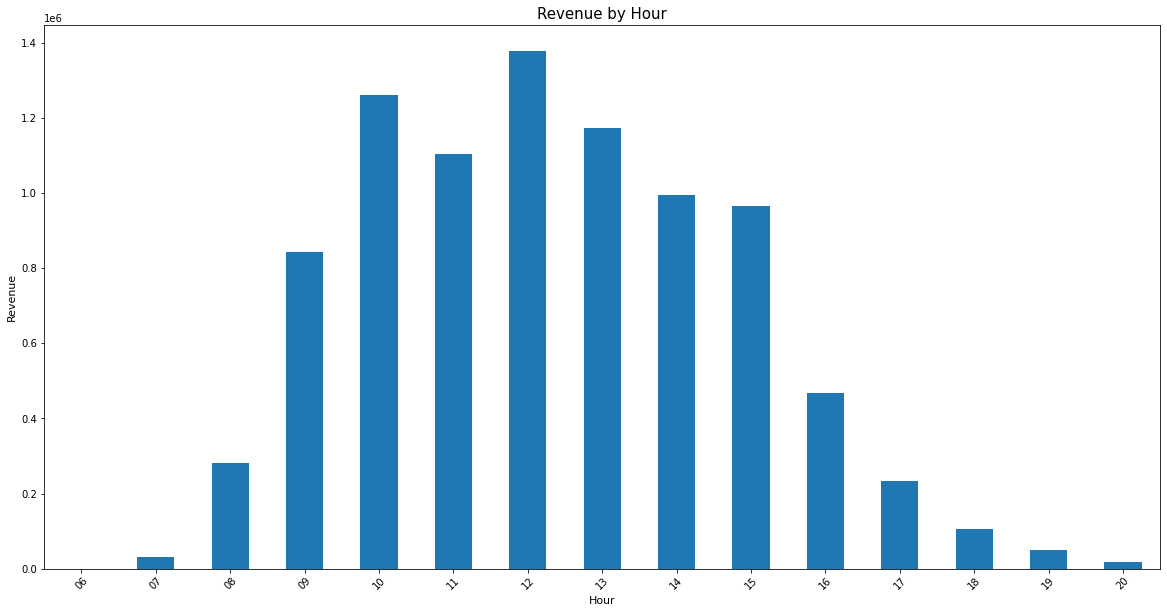

In [42]:
# 시간대별 매출
# 날짜.hour
def extract_hour(date):
  hour =str(date.hour)
  if date.hour < 10:
    hour = '0' + hour
  return hour

rev_by_hour = retail.set_index('InvoiceDate').groupby(extract_hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by Hour')

### **2-3. 매출에 대한 데이터 분석**
* 전체 매출의 82%가 UK에서 발생
* 가장 많은 주문이 발생한 달은 11월
* 11월의 판매량이 압도적으로 많음
* 일주일 중 목요일까지는 성장세, 이후로는 하락(토요일은 주문을 받지 않음)
* 7시에 주문 시작, 12시까지 증가세, 15시부터 급락

### **2-4. Top 10 매출 제품**

In [48]:
# 제품 StockCode, 수량 Quantity, 매출 CheckoutPrice
# 가장 개수로 많이 팔린 제품, 가장 매출이 높은 제품 Top 10
stockcode_by_quantity = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
stockcode_by_quantity

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [47]:
stockcode_by_checkoutprice = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)
stockcode_by_checkoutprice.head(10)

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

### **2-5. Top3 아이템의 월별 판매량 추이**

In [51]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[stockcode_by_quantity.index[:3]]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

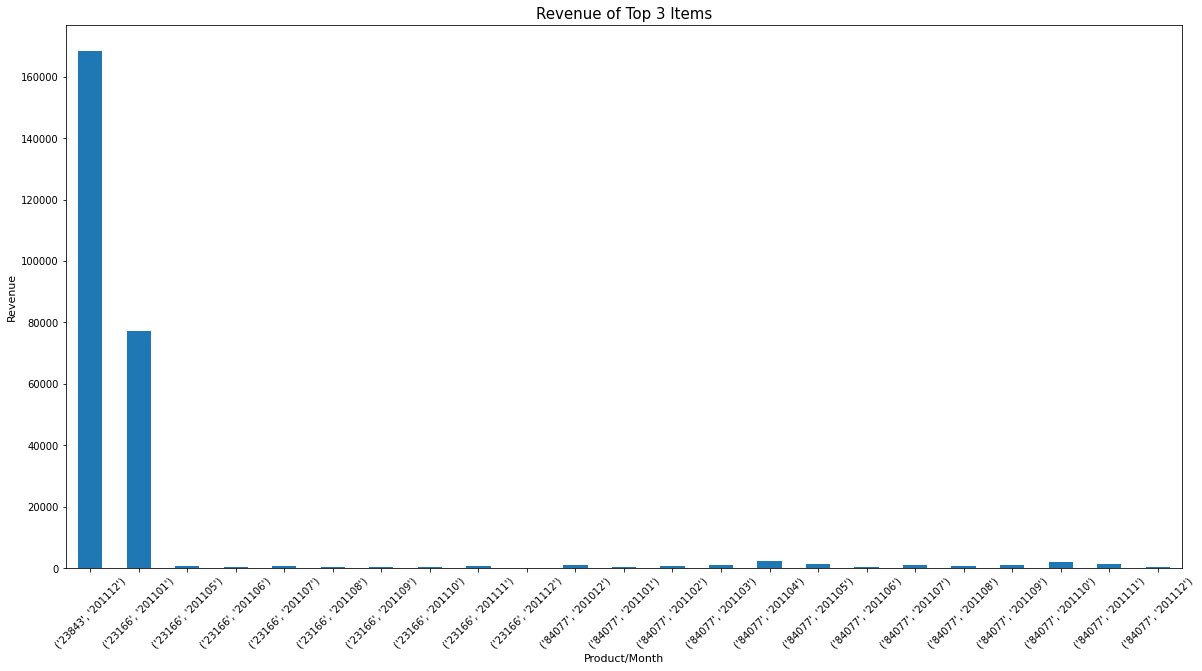

In [53]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month','Revenue','Revenue of Top 3 Items')

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
filename = '/content/drive/MyDrive/Colab Notebooks/OnlineRetailClean.csv'
data = pd.read_csv(filename, encoding='CP949')

In [61]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomId' : np.int32,
    'Quantity' : np.int32
}
retail = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetailClean.csv', dtype=dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# **3. 우수고객**

In [63]:
# 구매 횟수 기준
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)[:10]

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [64]:
# 지불 금액 기준
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

### **3-1. 사용자 기준으로 최초 구매한 월 연산하기**

In [66]:
from datetime import datetime

# 구매월(day는 무시)
#2010-12-01 08:10:00 -> 2010-12-01
#2010-12-10 10:00:00 -> 2010-12-01
def get_month_as_datetime(date):
  return datetime(date.year, date.month, 1)

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [68]:
month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


### **3-2. 기준이 되는 월과 실제 구매 월의 차이 계산하기**

In [76]:
# 각 구매가 최초 구매로부터 얼마의 월이 지났는지 연산
# MonthPassed : 1 (한달 지남)
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4
